In [92]:
import matplotlib as mlt
import matplotlib.pyplot as plt

import numpy as np
import cv2
from Utils import *

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed, IntSlider

%matplotlib inline
mlt.rcParams['figure.figsize'] = (18,8)

source_image = 'data\low_contrast.png'

# Histogram equalization
https://www.math.uci.edu/icamp/courses/math77c/demos/hist_eq.pdf (source from wiki page)

For a given image $x$, calculate the normalized histogram $p_x(i)$ : 
* For $p$ in $(0,..,L-1)$, $L$ being the number of possible intensity values, $p_x(i) =$ number of pixels with intensity $i$ / total number of pixels
* We obtain a 1D vector of length 256 : x axis = intensity value; y axis = number of pixels of that value

Calculate the normalized cumulative distribution function $cdf_x(i)$:
* For a given intensity value $i$, $cdf_x(i) = \sum_{j=0}^ip_x(i)$
* We obtain a 1D vector of length 256 : x axis = intensity value; y axis = probability of the intensity to be less or equal to that value

The intensity transformation function is defined as follows : $T(k)=floor((L-1)*cdf_x(k)$)

In [116]:
def hist_equalized_image(image):
    
    # Number of possible intensity values
    L = 256
        
    # Calculate the normalized histogram
    hist = cv2.calcHist([image],[0],None,[L],[0,L])
    hist /= hist.max()

    # Calculate the normalized cumulative distribution function
    cdf  = np.cumsum(hist)
    cdf /= cdf.max()
    
    # Apply formula to get new intensity value
    unscaled_heq_image = ((L-1)*cdf[image]).astype(np.uint8)
    
    # Scale back to be in [0, 255], we don't change pixels which had 0 intensity in the original
    hist_min = np.min(hist[np.nonzero(hist)])
    scaled_heq_image = (unscaled_heq_image - hist_min)/(hist.max() - hist_min)
    
    return scaled_heq_image

Let us take a low contrast grayscale image and apply this transformation on it. We can compare the original and resulting images, as well as their histograms.

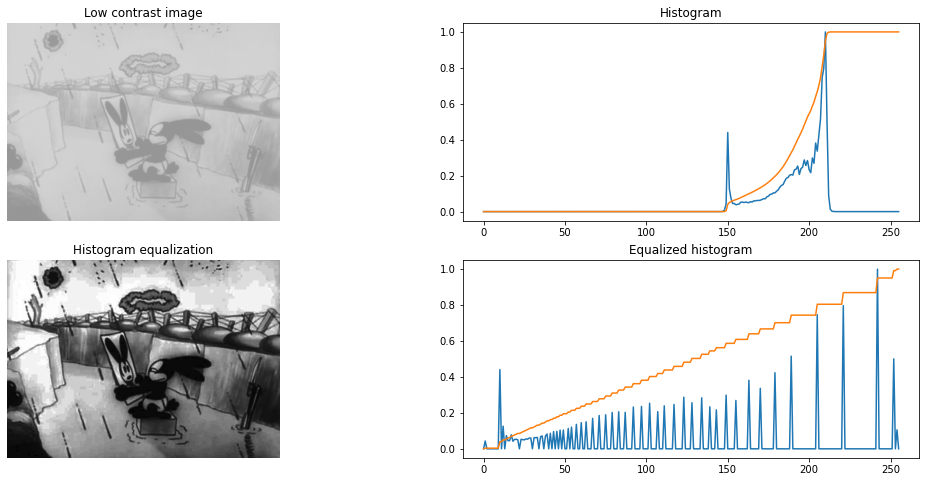

In [117]:
plt.subplot(2, 2, 1)
plt.title('Low contrast image')
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Histogram')
hist = cv2.calcHist([img_gray],[0],None,[256],[0,256])
plt.plot(hist/hist.max())
cdf  = np.cumsum(hist/hist.max())
plt.plot(cdf/cdf.max())

eq_image = hist_equalized_image(img_gray)
plt.subplot(2, 2, 3)
plt.title('Histogram equalization')
plt.imshow(eq_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Equalized histogram')
hist = cv2.calcHist([eq_image],[0],None,[256],[0,256])
plt.plot(hist/hist.max())
cdf  = np.cumsum(hist/hist.max())
plt.plot(cdf/cdf.max())
plt.show()